In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

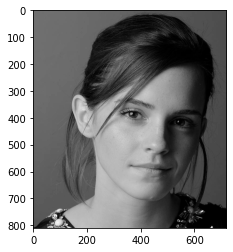

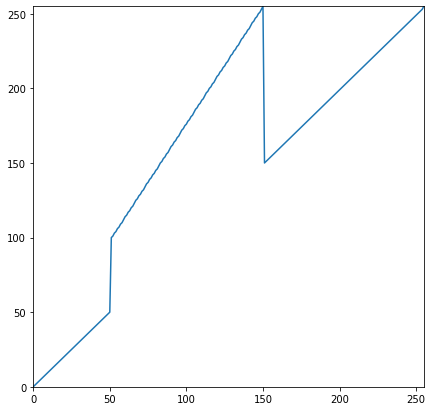

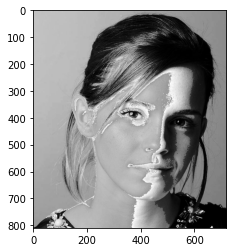

In [2]:
emma_img=cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma_img is not None
plt.imshow(emma_img,cmap='gray',vmin=0,vmax=255)
plt.show()

t1=np.linspace(0,50,51).astype(np.uint8)
t2=np.linspace(100,255,100).astype(np.uint8)
t3=np.linspace(150,255,105).astype(np.uint8)
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
new_emma_img=cv.LUT(emma_img,t)
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(t)
ax.set_xlim(0,255)
ax.set_ylim(0,255)
plt.show()

plt.imshow(new_emma_img,cmap='gray',vmin=0,vmax=256)
plt.show()

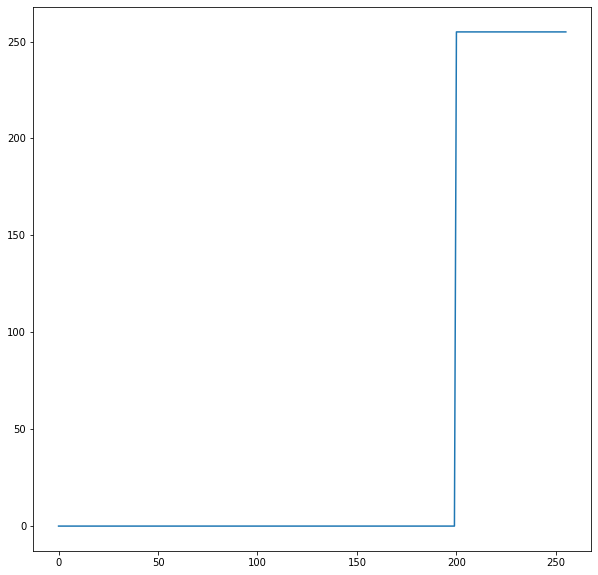

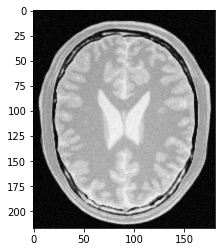

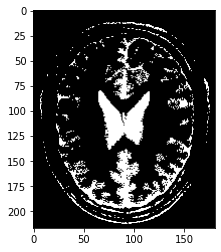

In [22]:
brain_img=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert brain_img is not None
t1=np.array([0 for r in range(0,200)])
t2=np.array([255 for r in range(200,256)])
t=np.concatenate((t1,t2),axis=0)
assert len(t)==256
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(t)
plt.show()
new_brain_img=cv.LUT(brain_img,t)
plt.imshow(brain_img,cmap='gray')
plt.show()
plt.imshow(new_brain_img,cmap='gray')
plt.show()

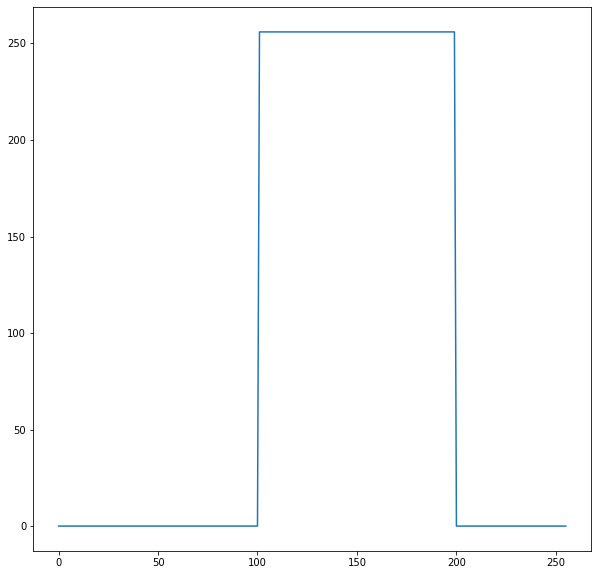

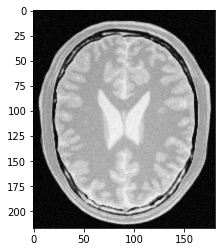

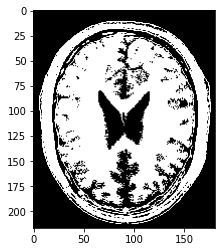

In [23]:
t1=np.array([0 for r in range(0,101)])
t2=np.array([256 for r in range(101,200)])
t3=np.array([0 for r in range(200,256)])
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(t)
plt.show()
new_brain_img=cv.LUT(brain_img,t)
plt.imshow(brain_img,cmap='gray')
plt.show()
plt.imshow(new_brain_img,cmap='gray')
plt.show()